In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 14.1MB/s 
     |████████████████████████████████| 1.8MB 28.1MB/s 
     |████████████████████████████████| 245kB 59.1MB/s 
     |████████████████████████████████| 1.6MB 49.0MB/s 
     |████████████████████████████████| 65.8MB 80kB/s 
     |████████████████████████████████| 174kB 50.5MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 6.8MB 50.4MB/s 
     |████████████████████████████████| 14.2MB 44.8MB/s 
     |████████████████████████████████| 276kB 53.0MB/s 
     |████████████████████████████████| 157.5MB 32kB/s 
     |████████████████████████████████| 604kB 45.4MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 3.1MB 49.6MB/s 
     |████████████████████████████████| 2.1MB 36.7MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 

In [ ]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

PATH = '/content/drive/MyDrive/Dacon_해석가능_모델/Dacon_해석가능모델_공유폴더/'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#train_err  = pd.read_csv(PATH+'train_err_data.csv')
#train_quality = pd.read_csv(PATH + "train_quality_data.csv")
train_prob = pd.read_csv("/content/drive/MyDrive/Dacon_해석가능_모델/data/train_problem_data.csv")

train_errtype_errcode = pd.read_csv(PATH + 'train_errcode.csv')
train_model = pd.read_csv(PATH + 'train_model_nm_사본.csv')
train_quality = pd.read_csv(PATH + 'train_total_quality_4_[2:7].csv')

test_errtype_errcode = pd.read_csv(PATH + 'test_errcode.csv')
test_model = pd.read_csv(PATH + 'test_model_nm_사본.csv')
test_quality = pd.read_csv(PATH + 'test_total_quality_4_[2:7].csv')



In [ ]:
train.dtypes

NameError: ignored

In [ ]:
train_errtype_errcode


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,problem
0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,0.0
1,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,10.0,11.0,1.0,15.0,151.0,128.0,0.0,4.0,1.0,3.0,1.0,756.0,751.0,5.0,1.0,22.0,0.0,0.0,0.0,0.0,250.0,0.0,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0,183.0,0.0,53.0,0.0,0.0,16.0,126.0,7.0,0.0,0.0,625.0,56.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1274.0,1.0
2,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,52.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,19.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,65.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0,42.0,7.0,1.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,229.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,16.0,19.0,3.0,5.0,143.0,91.0,0.0,0.0,0.0,0.0,0.0,140.0,119.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,176.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,98.0,104.0,0.0,0.0,0.0,9.0,7.0,14.0,0.0,0.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,8.

In [ ]:
train_model

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,0.0,0.0,317.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0
...,...,...,...,...,...,...,...,...,...,...
14995,0.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,826.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0


### Processing quality

In [ ]:
train_quality = pd.read_csv("/content/drive/MyDrive/Dacon_해석가능_모델/data/train_quality_data.csv")
test_quality = pd.read_csv("/content/drive/MyDrive/Dacon_해석가능_모델/data/test_quality_data.csv")

In [ ]:
train_quality.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828624.000000,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,2.043391,-0.181638,0.045878
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,32.695380,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,600.000000,14.000000,14.000000


In [ ]:
test_quality.describe()

,time,user_id,quality_0,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,7.479720e+05,747972.000000,641388.000000,726857.000000,747972.0,747972.0,747972.000000,747972.000000,747972.000000
mean,2.020112e+13,37418.280005,2.062694,6.286763,0.0,0.0,2.118419,-0.186356,0.040558
std,8.818205e+06,4260.373568,218.919971,1199.262744,0.0,0.0,33.651757,0.401407,0.337775
min,2.020103e+13,30000.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,2.020111e+13,33783.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2.020112e+13,37296.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.020112e+13,41081.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,2.020113e+13,44997.000000,93038.000000,636619.000000,0.0,0.0,600.000000,17.000000,19.000000


In [ ]:
id_error = train_quality[['user_id','errtype']].values
error = np.zeros((15000,42))
for person_idx, err in tqdm(id_error):
    # person_idx - 10000 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - 10000,err - 1] += 1


problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 

### 데이터 간단하게 살펴보기

In [ ]:
train_err.describe()

,user_id,time,errtype
count,1.655466e+07,1.655466e+07,1.655466e+07
mean,1.758495e+04,2.020112e+13,2.128030e+01
std,4.341885e+03,8.664375e+06,9.943175e+00
min,1.000000e+04,2.020103e+13,1.000000e+00
25%,1.392500e+04,2.020111e+13,1.500000e+01
50%,1.748500e+04,2.020112e+13,2.300000e+01
75%,2.122700e+04,2.020112e+13,3.100000e+01
max,2.499900e+04,2.020120e+13,4.200000e+01


In [ ]:
train_quality.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828624.000000,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,2.043391,-0.181638,0.045878
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,32.695380,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,600.000000,14.000000,14.000000


In [ ]:
train_prob

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [ ]:
# Target Variable의 분포를 살펴보자
target_col = 'time'

train_prob[target_col].value_counts().sort_index()

20201101000000     1
20201101010000     3
20201101020000     3
20201101090000     1
20201101110000     3
20201101120000     3
20201101130000    11
20201101140000     3
20201101150000     2
20201101160000    10
20201101170000     3
20201101180000     4
20201101190000    11
20201101200000     3
20201101210000     3
20201101220000     2
20201101230000     4
20201102000000     3
20201102100000     2
20201102110000    36
20201102120000    33
20201102130000    23
20201102140000     9
20201102150000    31
20201102160000    28
20201102170000    28
20201102180000    18
20201102190000    30
20201102200000    13
20201102210000     7
20201102220000     9
20201102230000    10
20201103000000     5
20201103030000     1
20201103040000     1
20201103080000     1
20201103110000    25
20201103120000    36
20201103130000    14
20201103140000     9
20201103150000    11
20201103160000    15
20201103170000    18
20201103180000    13
20201103190000    14
20201103200000     5
20201103210000     8
2020110322000

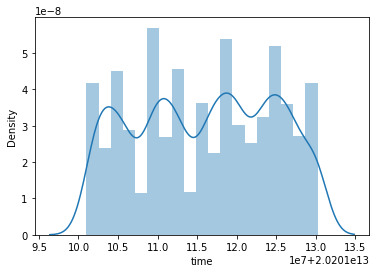

In [ ]:
# Dist-plot을 그려보도록 한다.
import seaborn as sns
sns.distplot( train_prob[target_col] )

### Precessing model_nm

In [ ]:
train_err['nm'] = train_err['model_nm'].str.split('_').str[1]

In [ ]:
train_err['nm'].describe()

count     16554663
unique           9
top              1
freq       5384491
Name: nm, dtype: object

In [ ]:
id_model = train_err[['user_id', 'nm']].values
model = np.zeros((15000,10))
for person_idx, mod in tqdm(id_model):
  #print(person_idx)
  #print(model)
  model[person_idx - 10000, int(mod) - 1] += 1



  0%|          | 0/16554663 [00:00<?, ?it/s]

  0%|          | 48732/16554663 [00:00<00:33, 487314.66it/s]

  1%|          | 97470/16554663 [00:00<00:33, 487332.31it/s]

  1%|          | 146605/16554663 [00:00<00:33, 488529.79it/s]

  1%|          | 194981/16554663 [00:00<00:33, 487087.40it/s]

  1%|▏         | 243969/16554663 [00:00<00:33, 487921.27it/s]

  2%|▏         | 294404/16554663 [00:00<00:33, 492734.13it/s]

  2%|▏         | 343456/16554663 [00:00<00:32, 492067.58it/s]

  2%|▏         | 393565/16554663 [00:00<00:32, 494738.75it/s]

  3%|▎         | 442456/16554663 [00:00<00:32, 492973.59it/s]

  3%|▎         | 491580/16554663 [00:01<00:32, 492450.25it/s]

  3%|▎         | 542497/16554663 [00:01<00:32, 497348.83it/s]

  4%|▎         | 593362/16554663 [00:01<00:31, 500683.42it/s]

  4%|▍         | 644581/16554663 [00:01<00:31, 504078.40it/s]

  4%|▍         | 694786/16554663 [00:01<00:31, 503467.22it/s]

  5%|▍         | 745602/16554663 [00:01<00:31, 504864.64it/s]

  5%|▍   

KeyboardInterrupt: ignored

### Processing err_type

In [ ]:

id_error = train_err[['user_id','errtype']].values
error = np.zeros((15000,42))
for person_idx, err in tqdm(id_error):
    # person_idx - 10000 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - 10000,err - 1] += 1


problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 



NameError: ignored

### Processing err_code

In [ ]:
train_errcode_table = train_err['errcode'].value_counts()
train_errcode_rname = list(train_err['errcode'].value_counts().index)
display(train_errcode_table.head())

1                     8906967
0                     2599123
connection timeout    1835600
B-A8002                897863
80                     334018
Name: errcode, dtype: int64

In [ ]:
selected_errcode = list(train_errcode_rname[:100])
# Only elements which are in 'test_errcode_rname' as well. Preserve order
selected_errcode = [x for x in selected_errcode if x in test_errcode_rname]
other_errcode = list(set(selected_errcode) ^ set(test_errcode_rname))

# Assign 0, 1, 2, ..., n to selected_errcode
selected_dictionary = {string : i for i,string in enumerate(selected_errcode)}
# Assign 98 to other_errcode (98 is 'Others')
other_dictionary = {string : len(selected_errcode) for string in other_errcode}
# Merge together (No duplicate, therefore it does not matter)
merged_dictionary = dict(selected_dictionary, **other_dictionary)
print(merged_dictionary)

{'1': 0, '0': 1, 'connection timeout': 2, 'B-A8002': 3, '80': 4, '79': 5, '14': 6, 'active': 7, '2': 8, '84': 9, '85': 10, 'standby': 11, 'NFANDROID2': 12, 'connection fail to establish': 13, '3': 14, '90': 15, '89': 16, 'S-61001': 17, '95': 18, '94': 19, '4': 20, '13': 21, 'Q-64002': 22, '8.0': 23, '6': 24, '5': 25, '78': 26, '81': 27, '86': 28, 'connectionterminated by local host': 29, 'UNKNOWN': 30, '100': 31, 'terminate by peer user': 32, '99': 33, '83': 34, 'V-21008': 35, 'S-65002': 36, '87': 37, '88': 38, 'H-51042': 39, '82': 40, '91': 41, '21': 42, 'B-51049': 43, '92': 44, '93': 45, 'J-30021': 46, '105': 47, '77': 48, '104': 49, 'H-51049': 50, '700001': 51, 'scanning timeout': 52, '110': 53, '96': 54, '76': 55, '98': 56, 'Q-64001': 57, 'V-21005': 58, 'connection fail for LMP response timout': 59, '97': 60, 'P-44010': 61, 'C-11017': 62, 'H-51046': 63, 'PHONE_ERR': 64, 'P-44010 ': 65, 'S-64002': 66, 'B-51042': 67, 'C-12032': 68, 'P-41007 ': 69, '101': 70, '109': 71, '75': 72, 'V-2

In [ ]:
train_err["errcode"] = train_err["errcode"].map(merged_dictionary)
train_err["errcode"] = train_err["errcode"].fillna(len(selected_errcode))
train_err["errcode"] = pd.to_numeric(train_err["errcode"], downcast="integer")

In [ ]:
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000


id_errorcode = train_err[['user_id', 'errcode']].values
errorcode = np.zeros((train_user_number, len(selected_dictionary) + 1))

for person_idx, errcode in tqdm(id_errorcode):
  errorcode[person_idx - train_user_id_min, errcode - 1] += 1

#print(error.shape)
#print(errorcode.shape)



  0%|          | 0/16554663 [00:00<?, ?it/s]

  0%|          | 38581/16554663 [00:00<00:42, 385803.01it/s]

  0%|          | 77726/16554663 [00:00<00:42, 387477.29it/s]

  1%|          | 115572/16554663 [00:00<00:42, 384725.46it/s]

  1%|          | 153245/16554663 [00:00<00:42, 382289.30it/s]

  1%|          | 189802/16554663 [00:00<00:43, 377114.94it/s]

  1%|▏         | 228386/16554663 [00:00<00:42, 379688.71it/s]

  2%|▏         | 268746/16554663 [00:00<00:42, 386558.54it/s]

  2%|▏         | 307940/16554663 [00:00<00:41, 388155.30it/s]

  2%|▏         | 346196/16554663 [00:00<00:41, 386457.76it/s]

  2%|▏         | 385493/16554663 [00:01<00:41, 388386.02it/s]

  3%|▎         | 423261/16554663 [00:01<00:42, 383009.66it/s]

  3%|▎         | 461701/16554663 [00:01<00:41, 383425.54it/s]

  3%|▎         | 502103/16554663 [00:01<00:41, 389377.15it/s]

  3%|▎         | 542756/16554663 [00:01<00:40, 394366.45it/s]

  4%|▎         | 582984/16554663 [00:01<00:40, 396706.62it/s]

  4%|▍   

In [ ]:
train_err

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,10.0,11.0,1.0,15.0,151.0,128.0,0.0,4.0,1.0,3.0,1.0,756.0,751.0,5.0,1.0,22.0,0.0,0.0,0.0,0.0,250.0,0.0,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0
2,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,52.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,19.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,65.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,16.0,19.0,3.0,5.0,143.0,91.0,0.0,0.0,0.0,0.0,0.0,140.0,119.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,176.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,8.0,8.0,26.0,18.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,31.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,4.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,16.0,18.0,4.0,1.0,181.0,138.0,0.0,0.0,0.0,0.0,0.0,50.0,29.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,223.0,0.0,16.0,17.0,0.0,1.0,1.0,0.0,0.0,58.0,8.0,5.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,0.0,1.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,14.0,0.0,15.0,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0


### Concat data(숨김)

In [ ]:
train_err = pd.DataFrame(data=error)
train_model = pd.DataFrame(data=model)
train_model.columns = ['model'+'_'+str(i) for i in range(1,11)]


In [ ]:
#train_model.to_csv(PATH+'model_nm.csv', index = False)

In [ ]:
train_err = pd.DataFrame(data=error)
train_model = pd.DataFrame(data=model)
train_model.columns = [i for i in range(42,42+10)]

train = pd.concat([train_err, train_model], axis = 1)

train['problem'] = problem
del error, model, problem



### Concat data

In [ ]:
train = pd.concat([train_errtype_errcode, train_model], axis = 1)
train = pd.concat([train, train_quality], axis = 1)

In [ ]:
train_errtype_errcode = []
train_model = []
train_quality = []

In [ ]:
train.dtypes

0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
17              float64
18              float64
19              float64
20              float64
21              float64
22              float64
23              float64
24              float64
25              float64
26              float64
27              float64
28              float64
29              float64
30              float64
31              float64
32              float64
33              float64
34              float64
35              float64
36              float64
37              float64
38              float64
39              float64
40              float64
41              

### Precessing problem(숨김)

In [ ]:

problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 

train['problem'] = problem
del problem

### Processing problem

In [ ]:
problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 

train['problem'] = problem
del problem

In [ ]:
train['problem']

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
14995    0.0
14996    0.0
14997    1.0
14998    1.0
14999    0.0
Name: problem, Length: 15000, dtype: float64

### Modeling

In [ ]:
clf = setup(data = train, target = 'problem', feature_selection = True, feature_interaction = True, use_gpu = True, fix_imbalance = True, feature_ratio = True) 

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:44:11
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
0,Numeric
1,Numeric
2,Numeric
3,Numeric
4,Numeric
...,...
quality_12_1,Numeric
quality_12_2,Numeric
quality_12_3,Numeric
quality_12_4,Numeric



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7992,0.8293,0.5759,0.7638,0.6562,0.5184,0.5290,16.023
catboost,CatBoost Classifier,0.7976,0.8287,0.5639,0.7669,0.6496,0.5120,0.5242,167.459
gbc,Gradient Boosting Classifier,0.7949,0.8244,0.5642,0.7586,0.6465,0.5067,0.5180,138.309
rf,Random Forest Classifier,0.7869,0.8171,0.5793,0.7261,0.6439,0.4948,0.5015,15.497
et,Extra Trees Classifier,0.7842,0.8154,0.5842,0.7159,0.6431,0.4907,0.4961,14.870
ada,Ada Boost Classifier,0.7766,0.8054,0.5839,0.6970,0.6350,0.4759,0.4801,32.437
lda,Linear Discriminant Analysis,0.7566,0.7671,0.5707,0.6548,0.6095,0.4341,0.4365,11.509
ridge,Ridge Classifier,0.7494,0.0000,0.5693,0.6391,0.6018,0.4200,0.4217,9.387
lr,Logistic Regression,0.7106,0.7184,0.6299,0.5584,0.5918,0.3690,0.3708,20.856
dt,Decision Tree Classifier,0.7023,0.6742,0.5887,0.5500,0.5685,0.3417,0.3423,17.235


CatBoost, Lightgbm, gbc, et,rf 가 골고루 AUC 0.8대를 보여주기 때문에 5개를 골라 블렌딩 해보겠습니다

In [ ]:
blended = blend_models(estimator_list = best_5, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8431,0.6243,0.7613,0.6860,0.5512,0.5568
1,0.8010,0.8328,0.5843,0.7631,0.6618,0.5243,0.5337
2,0.7938,0.8242,0.5429,0.7708,0.6370,0.4990,0.5140
3,0.8052,0.8243,0.5814,0.7782,0.6656,0.5322,0.5435
4,0.7842,0.8215,0.5279,0.7500,0.6196,0.4753,0.4896
Mean,0.7987,0.8292,0.5722,0.7647,0.6540,0.5164,0.5275
SD,0.0089,0.0079,0.0340,0.0095,0.0232,0.0265,0.0236


In [ ]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7845,0.8208,0.5423,0.742,0.6266,0.4803,0.4919


In [ ]:
final_model = finalize_model(blended)

### Processing test data(숨김)

In [ ]:
test_err  = pd.read_csv(PATH+'test_err_data.csv')
test_err['nm'] = test_err['model_nm'].str.split('_').str[1]

id_error = test_err[['user_id','errtype']].values
test_err_x = np.zeros((14999,42))
for person_idx, err in tqdm(id_error):
    test_err_x[person_idx - 30000,err - 1] += 1

id_model = test_err[['user_id','nm']].values
test_model_x = np.zeros((14999,10))
for person_idx, mod in tqdm(id_model):
  test_model_x[person_idx - 30000, int(mod) - 1] += 1



100%|██████████| 16532648/16532648 [00:33<00:00, 489914.65it/s]


In [ ]:
test_errcode_table = test_err['errcode'].value_counts()
test_errcode_rname = list(test_err['errcode'].value_counts().index)
display(test_errcode_table.head())

1                     8750154
0                     2565532
connection timeout    1890632
B-A8002                855747
80                     326179
Name: errcode, dtype: int64

In [ ]:

#test_err = pd.DataFrame(data=test_err_x)
#test_model = pd.DataFrame(data=test_model_x)


test_err = test_err_x.reshape(test_err_x.shape[0],-1)
test_model = test_model_x.reshape(test_model_x.shape[0],-1)
test_err_df = pd.DataFrame(data=test_err)
test_model_df = pd.DataFrame(data=test_model)
test_model_df.columns = ['model'+'_'+str(i) for i in range(1,11)]
test_model_df.to_csv(PATH+'test_model_nm.csv', index = False)



In [ ]:
test_model_df

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,2687.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.0
4,623.0,258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,1115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2233.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24671.0


In [ ]:

test = pd.concat([test_err_df, test_model_df], axis = 1)

### Concat data

In [ ]:
test = pd.concat([test_errtype_errcode, test_model], axis = 1)
#test = pd.concat([test, test_quality], axis = 1)

In [ ]:
test_model

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,2687.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.0
4,623.0,258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,1115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2233.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24671.0


In [ ]:
test = test[0:len(test)-1]

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,quality_9_0,quality_9_1,quality_9_2,quality_9_3,quality_9_4,quality_9_5,quality_9_6,quality_9_7,quality_9_8,quality_9_9,quality_10_0,quality_10_1,quality_10_2,quality_10_3,quality_10_4,quality_10_5,quality_10_6,quality_10_7,quality_10_8,quality_10_9,quality_11_0,quality_11_1,quality_11_2,quality_11_3,quality_11_4,quality_11_5,quality_11_6,quality_11_7,quality_11_8,quality_11_9,quality_12_0,quality_12_1,quality_12_2,quality_12_3,quality_12_4,quality_12_5,quality_12_6,quality_12_7,quality_12_8,quality_12_9
0,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,3.0,67.0,37.0,9.0,3.0,0.0,1.0,0.0,983.0,1308.0,5.0,2.0,32.0,0.0,0.0,0.0,0.0,83.0,2.0,16.0,0.0,1.0,3.0,3.0,0.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,0.0,12.0,16.0,4.0,6.0,53.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
2,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,1.0,173.0,133.0,0.0,0.0,0.0,0.0,0.0,60.0,40.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,230.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,14.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,108.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
3,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,0.0,4.0,5.0,1.0,7.0,8.0,12.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,5.0,2.0,2.0,0.0,0.0,134.0,0.0,4.0,16.0,3.0,1.0,1.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,12.0,24.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
4,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,0.0,10.0,12.0,1.0,18.0,80.0,67.0,6.0,0.0,0.0,0.0,0.0,10.0,8.0,0.0,0.0,14.0,1.0,1.0,0.0,0.0,332.0,152.0,11.0,6.0,1.0,1.0,1.0,1.0,0.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,0.0,16.0,19.0,3.0,9.0,123.0,93.0,12.0,0.0,0.0,0.0,0.0,197.0,204.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,179.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
14995,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,14.0,15.0,1.0,4.0,149.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,183.0,0.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,13.0,1.0,3.0,129.0,90.0,2.0,0.0,0.0,0.0,0.0,138.0,165.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,163.0,0.0,12.0,1118.0,0.0,1.0,1.0,1.0,0.0,329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,36.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,12.0,36.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
14997,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,15.0,16.0,0.0,1.0,73.0,44.0,0.0,1.0,0.0,1.0,0.0,11127.0,13161.0,0.0,3.0,44.0,0.0,0.0,0.0,0.0,78.0,0.0,14.0,0.0,0.0,1.0,1.0,3.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0

In [ ]:
predictions = predict_model(final_model, data = test)

In [ ]:
predictions['Score']

0        0.9410
1        0.6966
2        0.6083
3        0.8584
4        0.8622
          ...  
14994    0.7646
14995    0.5072
14996    0.6971
14997    0.8245
14998    0.5695
Name: Score, Length: 14999, dtype: float64

In [ ]:
#pycaret에서는 score이 label을 맞출 확률이기때문에 output을 제출 양식에 맞게 바꿔줍니다
x = []
for i in range(len(predictions['Score'])):
  if predictions['Label'][i] =='1.0':
    x.append(predictions['Score'][i])
  else:
    x.append(1-predictions['Score'][i])

In [ ]:
sample_submssion = pd.read_csv('/content/drive/MyDrive/Dacon_해석가능_모델/data/sample_submission.csv')
sample_submssion['problem'] = x
sample_submssion.to_csv("/content/drive/MyDrive/Dacon_해석가능_모델/data/AutoML_19.csv", index = False)

In [ ]:
!ls

AutoML.csv  catboost_info  drive  logs.log  sample_data
